DEM Differencing from IFSAR and ArcticDEM

In [1]:
# gdal command line tools to reproject, xdem does the same thing 

#gdal_calc.py -A SETSM_s2s041_W1W1_20110925_1020010014920D00_1020010015562300_2m_lsf_seg1_dem_10m_shade_masked.tif -B NSIDC_ifsar_hubbardDEM.tif --calc="A-B" --extent=intersect --outfile=difference.tif
#gdalwarp -t_srs EPSG:3413 -tr 10 10 ifsar_hubbardDEM.tif NSIDC_ifsar_hubbardDEM.tif
#gdal_calc.py -A SETSM_s2s041_W1W1_20110925_1020010014920D00_1020010015562300_2m_lsf_seg1_dem_10m_shade_masked.tif -B ifsar_hubbardDEM.tif --calc="A-B" --outfile=difference.tif

In [2]:
import os
import re
import xdem
from datetime import datetime
import matplotlib.pyplot as plt
import geoutils as gu
import numpy as np
import pyproj
import geopandas as gpd

In [3]:
#load in ArticDEM data and simplify file names to just dates 

directory_path = '/Users/amyjenson/Desktop/ArcticDEM/differencing'

# Regular expression pattern to extract the date from the file name
pattern = re.compile(r'(\d{4})(\d{2})(\d{2})')

# Function to extract and format the date from the file name
def extract_date(file_name):
    match = pattern.search(file_name)
    if match:
        year, month, day = match.groups()
        return f"{year}-{month}-{day}"
    else:
        return None

# Function to rename files
def rename_files(directory):
    for file_name in os.listdir(directory):
        if file_name.endswith('.tif'):
            old_path = os.path.join(directory, file_name)
            new_name = extract_date(file_name)
            if new_name:
                new_path = os.path.join(directory, f"{new_name}.tif")
                os.rename(old_path, new_path)

# Rename the files in the directory
rename_files(directory_path)


#load dem files and order them by date 
dem_files = [f for f in os.listdir(directory_path) if re.match(r'\d{4}-\d{2}-\d{2}\.tif', f)]
dem_files.sort()  # Sort the files based on their names (which contain dates)

In [4]:
#load ifsar dem in AK albers projection
dem_ifsar = xdem.DEM("/Users/amyjenson/Desktop/ArcticDEM/differencing/ifsar_hubbardDEM.tif")
# tell xdem what vertical  projection
dem_ifsar.set_vcrs(pyproj.CRS("EPSG:5703"))
#set vcrs from geoid to ellipsoid
dem_ifsar.to_vcrs("Ellipsoid")

#load hubbard outline
hubbard_outline = gu.Vector("hubbard_outline.shx")

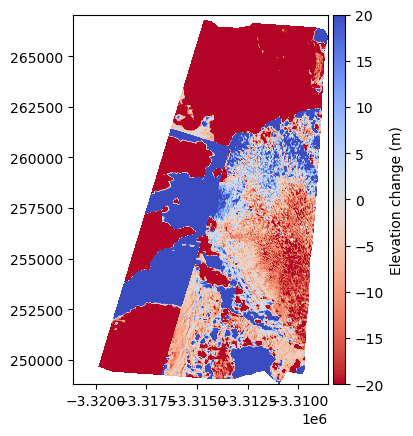

In [13]:
# difference ifsar and arctic dem in loop and in single time frame

# in loop 
# dem_arctic = {}
# ddem = {}

# for j in range(len(dem_files)):
#     file = dem_files[j]
#     dem_arctic[j] = xdem.DEM(file)
#     dem_ifsar = dem_ifsar.reproject(dem_arctic[j], silent=True)
#     ddem = dem_ifsar - dem_arctic[j]
#     ddem.show(cmap="coolwarm_r", vmin=-20, vmax=20, cbar_title="Elevation change (m)")

#single time 

#load 
file = dem_files[0]
date = file.split('.')[0]
dem_arctic = xdem.DEM(file)

dem_ifsar = dem_ifsar.reproject(dem_arctic, silent=True)
ddem = dem_ifsar - dem_arctic
ddem.show(cmap="coolwarm_r", vmin=-20, vmax=20, cbar_title="Elevation change (m)")
plt.savefig(f'dem_difference_ifsar2012-{date}.png')

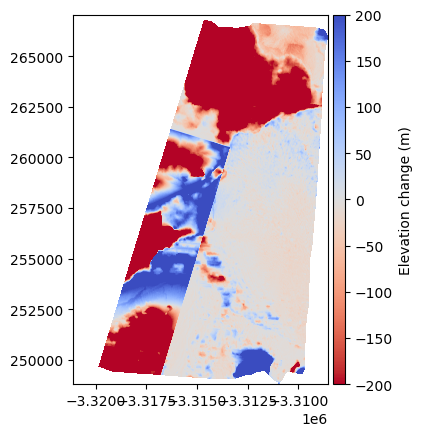

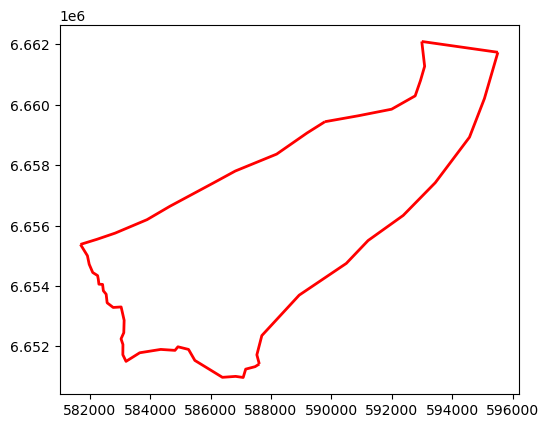

In [6]:
# attempting to place outline on dem (probably not necessary) 

# ax = ddem.show(cmap="coolwarm_r", vmin=-20, vmax=20, cbar_title="Elevation change (m)")
# shapefile_path = 'hubbard_outline3413.shp'
# gdf = gpd.read_file(shapefile_path)

# # Plot the shapefile on top of the DEM
# gdf.plot(ax=ax, facecolor='none', edgecolor='red', linewidth=2)

# # Show the plot
# plt.show()